In [1]:
import numpy as np
import xarray as xr
from datetime import datetime
import cftime
import dask
import matplotlib.pyplot as plt
import xclim
from xclim import icclim


### Animation comparison

In [2]:
cd ../../UNIT

/home/dfulu/repos/climateTranslation/UNIT


In [3]:
from data import construct_regridders
from utils import reduce_height

In [4]:
cd ../notebooks/data_analysis

/home/dfulu/repos/climateTranslation/notebooks/data_analysis


In [5]:
reduce_dict = {0: ['pr'], 2: ['tas', 'tasmin', 'tasmax']}

In [6]:
ds_cam = reduce_height(xr.open_zarr('/datadrive/cam5/nat_hist_zarr', consolidated=True), reduce_dict)
ds_cam2had = xr.open_zarr('/datadrive/cam5/nat_hist_to_hadgem3_v3_zarr', consolidated=True)
ds_had = reduce_height(xr.open_zarr('/datadrive/hadgem3/nat_hist_zarr', consolidated=True), reduce_dict)

In [7]:
agg_had = xr.open_dataset("/datadrive/hadgem3/nat_hist_agg.nc").load()
agg_cam = xr.open_dataset("/datadrive/cam5/nat_hist_agg.nc").load()
agg_cam2had = xr.open_dataset("/datadrive/cam5/nat_hist_to_hadgem3_4ch_agg.nc").load()

In [8]:
agg_had = reduce_height(agg_had, reduce_dict)
agg_cam = reduce_height(agg_cam, reduce_dict)

In [9]:
rg_a, rg_b = construct_regridders(agg_had, agg_cam)

agg_had = agg_had if rg_a is None else rg_a(agg_had).astype(np.float32)
agg_cam = agg_cam if rg_b is None else rg_b(agg_cam).astype(np.float32)

Create weight file: bilinear_324x432_192x288_peri.nc
Remove file bilinear_324x432_192x288_peri.nc
using dimensions ('lat', 'lon') from data variable pr as the horizontal dimensions for this dataset.


In [10]:
ds_list = [agg_had, agg_cam2had, agg_cam]

In [11]:
ds_allmod = xr.concat(ds_list, dim='source').assign_coords(source=['had', 'cam2had', 'cam'])
ds_allmod_diff = ds_allmod - ds_allmod.sel(source='cam2had')

In [12]:
def plot_comp(stat, variables=['pr', 'tasmin', 'tas', 'tasmax']):
    for v in variables:
        fig = ds_allmod[v].sel(aggregate_statistic=stat).plot(col='source')
        plt.suptitle(f'{stat} for each data source : {v}', y=1.05)
        ds_allmod_diff[v].sel(aggregate_statistic=stat).plot(col='source')
        plt.suptitle(f'{stat} for each x = data source - cam2had : {v}', y=1.05)
    return fig

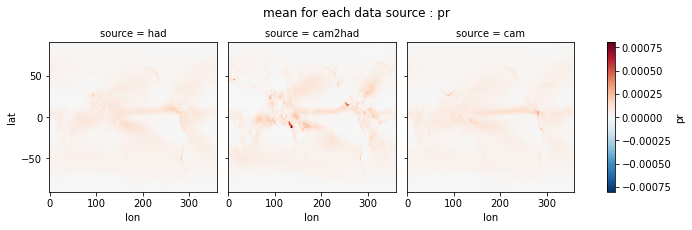

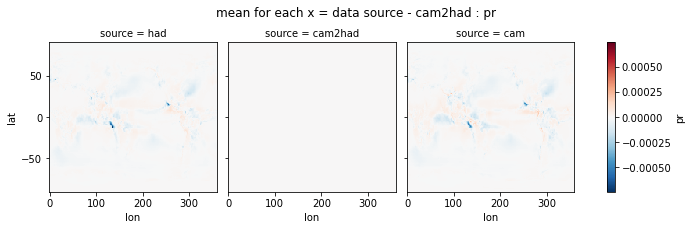

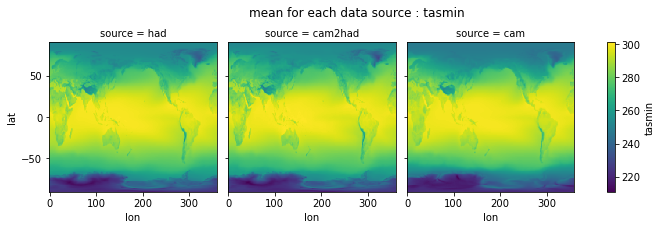

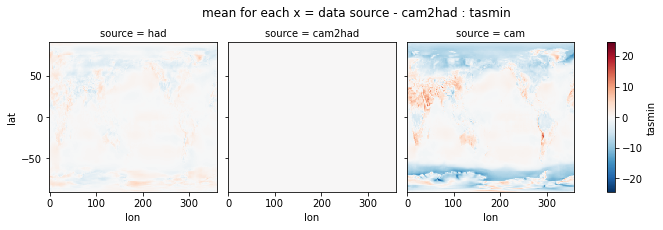

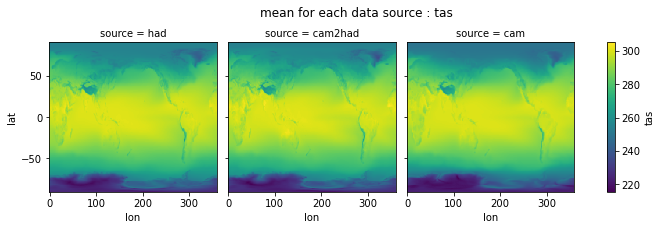

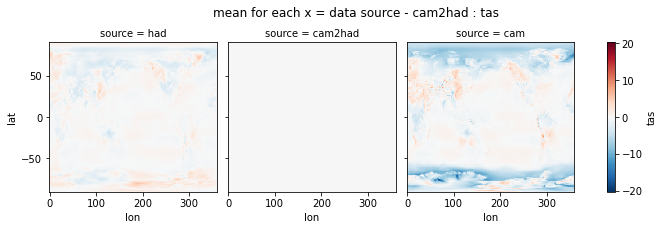

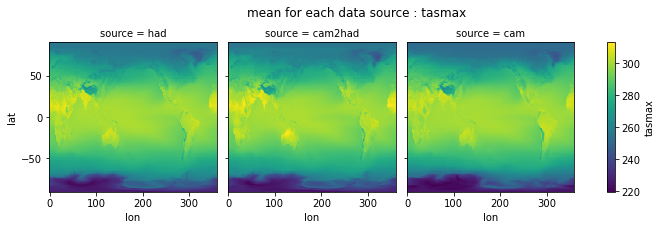

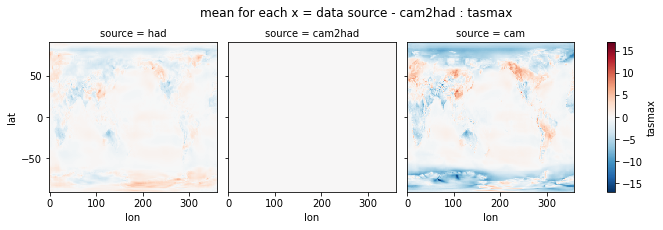

In [13]:
plot_comp('mean')

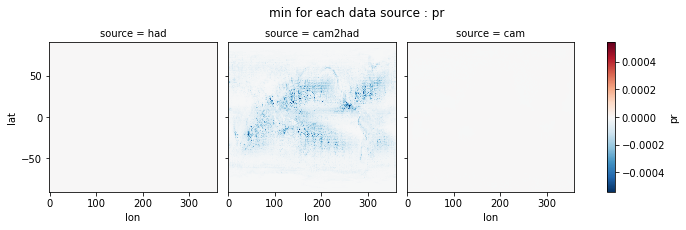

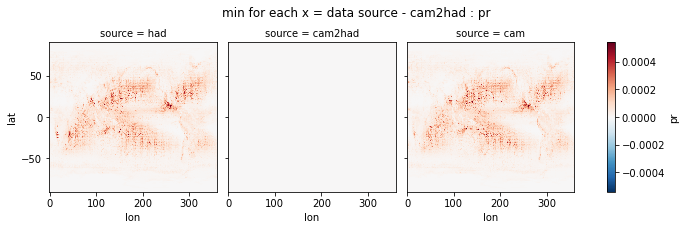

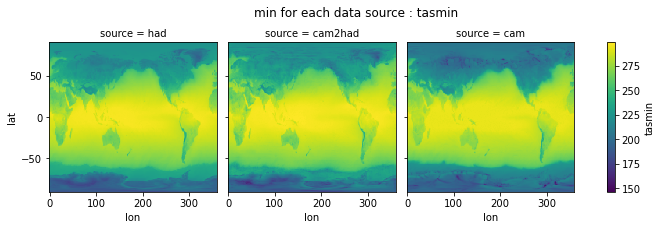

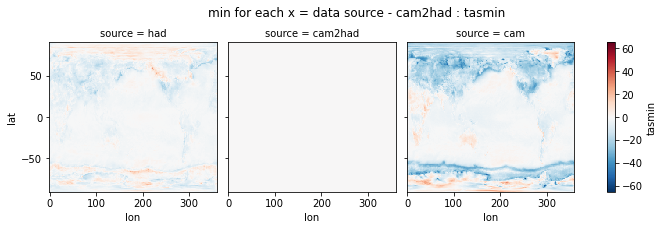

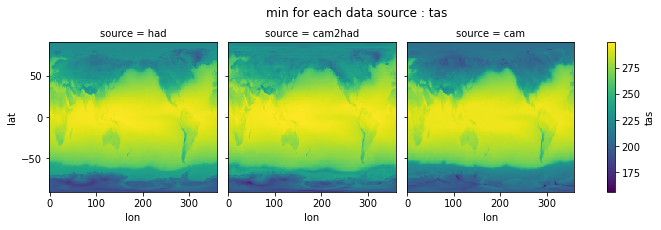

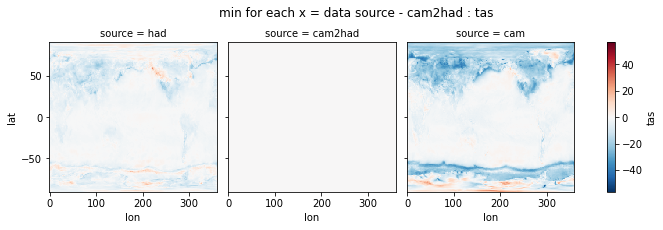

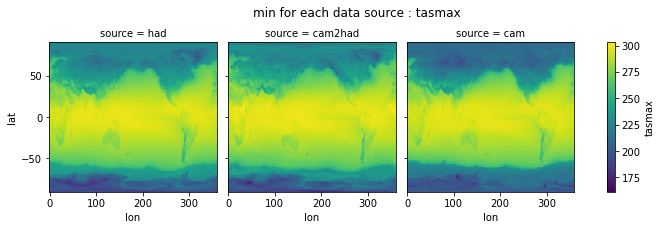

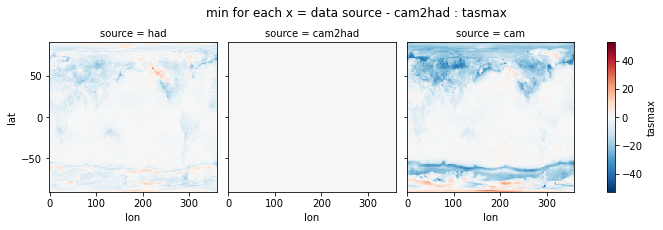

In [14]:
plot_comp('min')

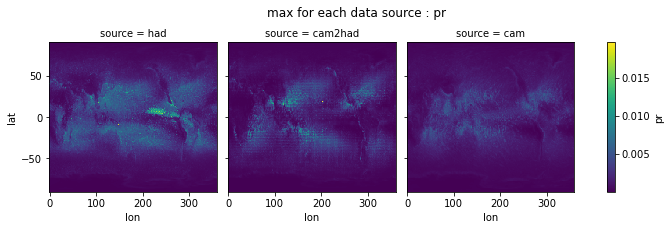

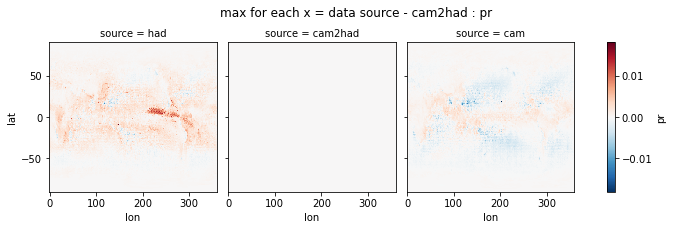

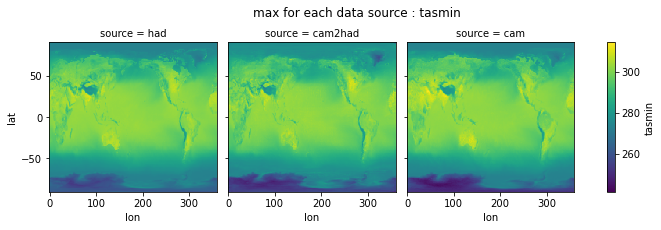

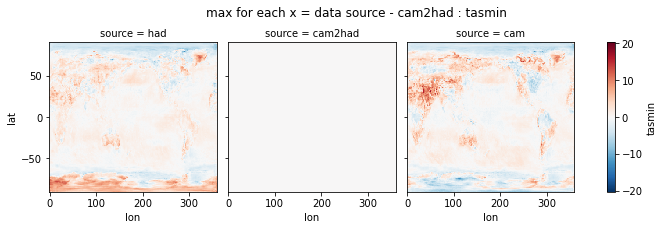

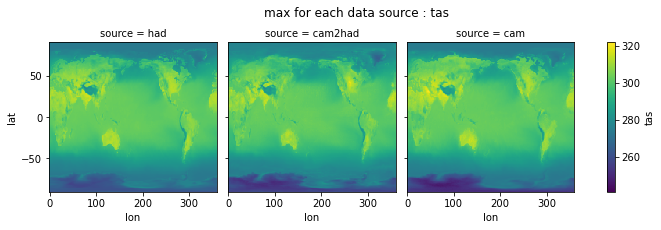

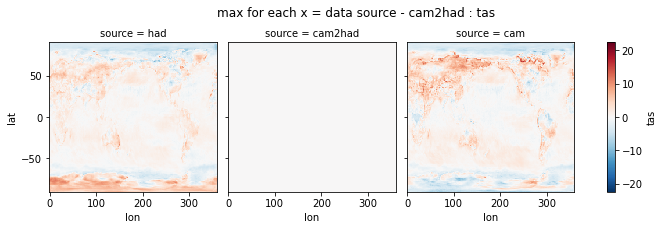

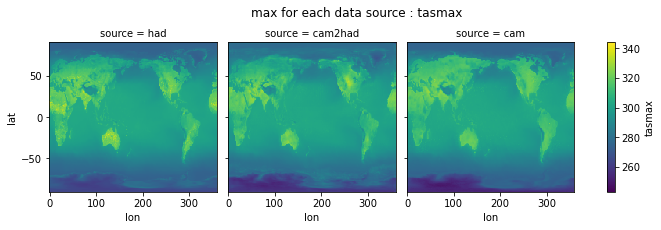

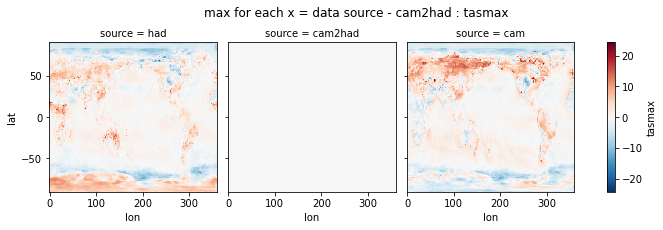

In [15]:
plot_comp('max')